         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

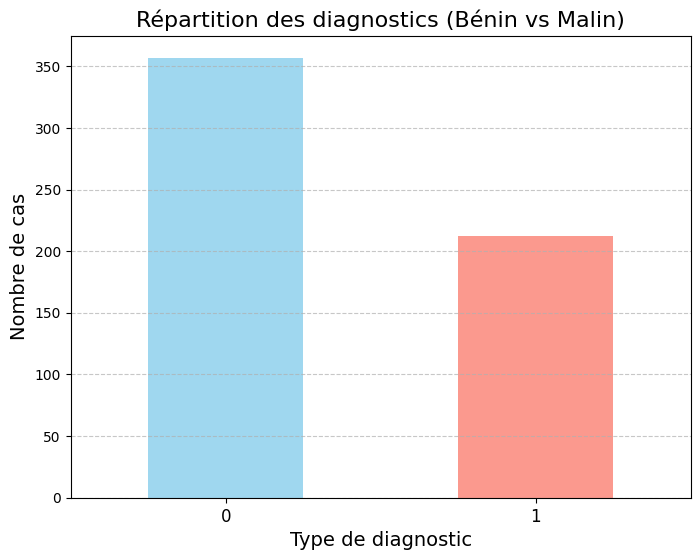

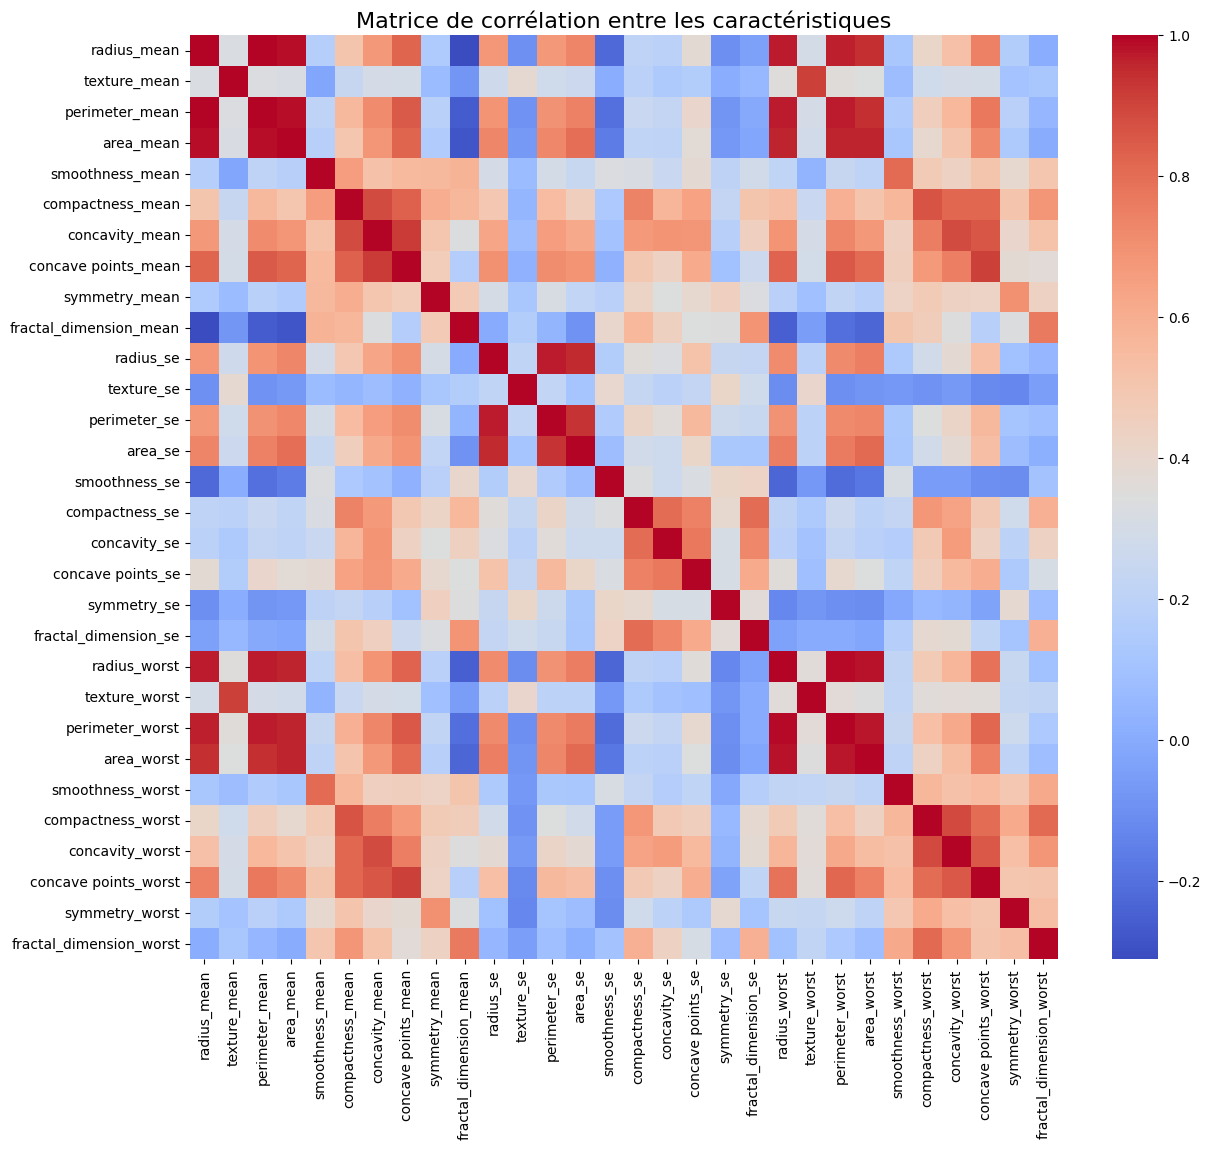

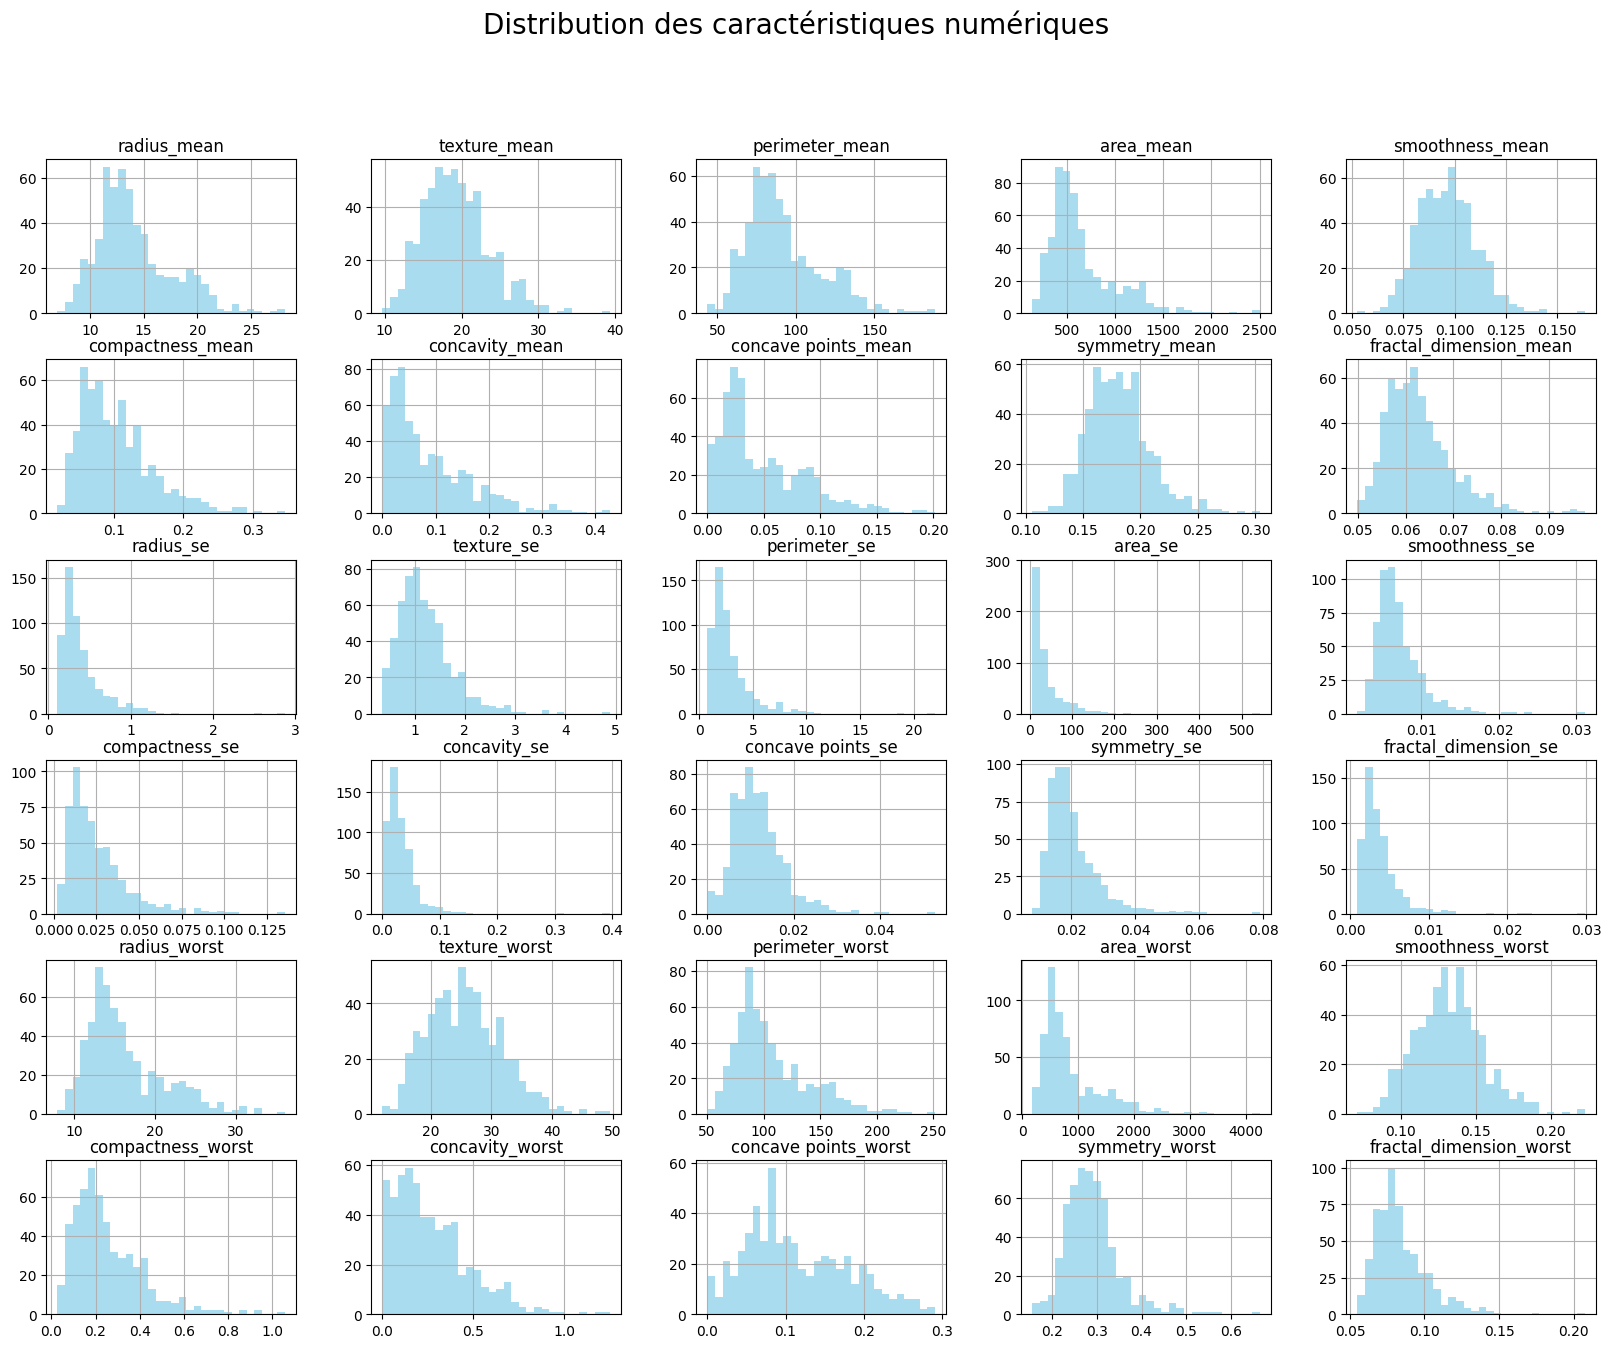

C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3577686764.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppDa

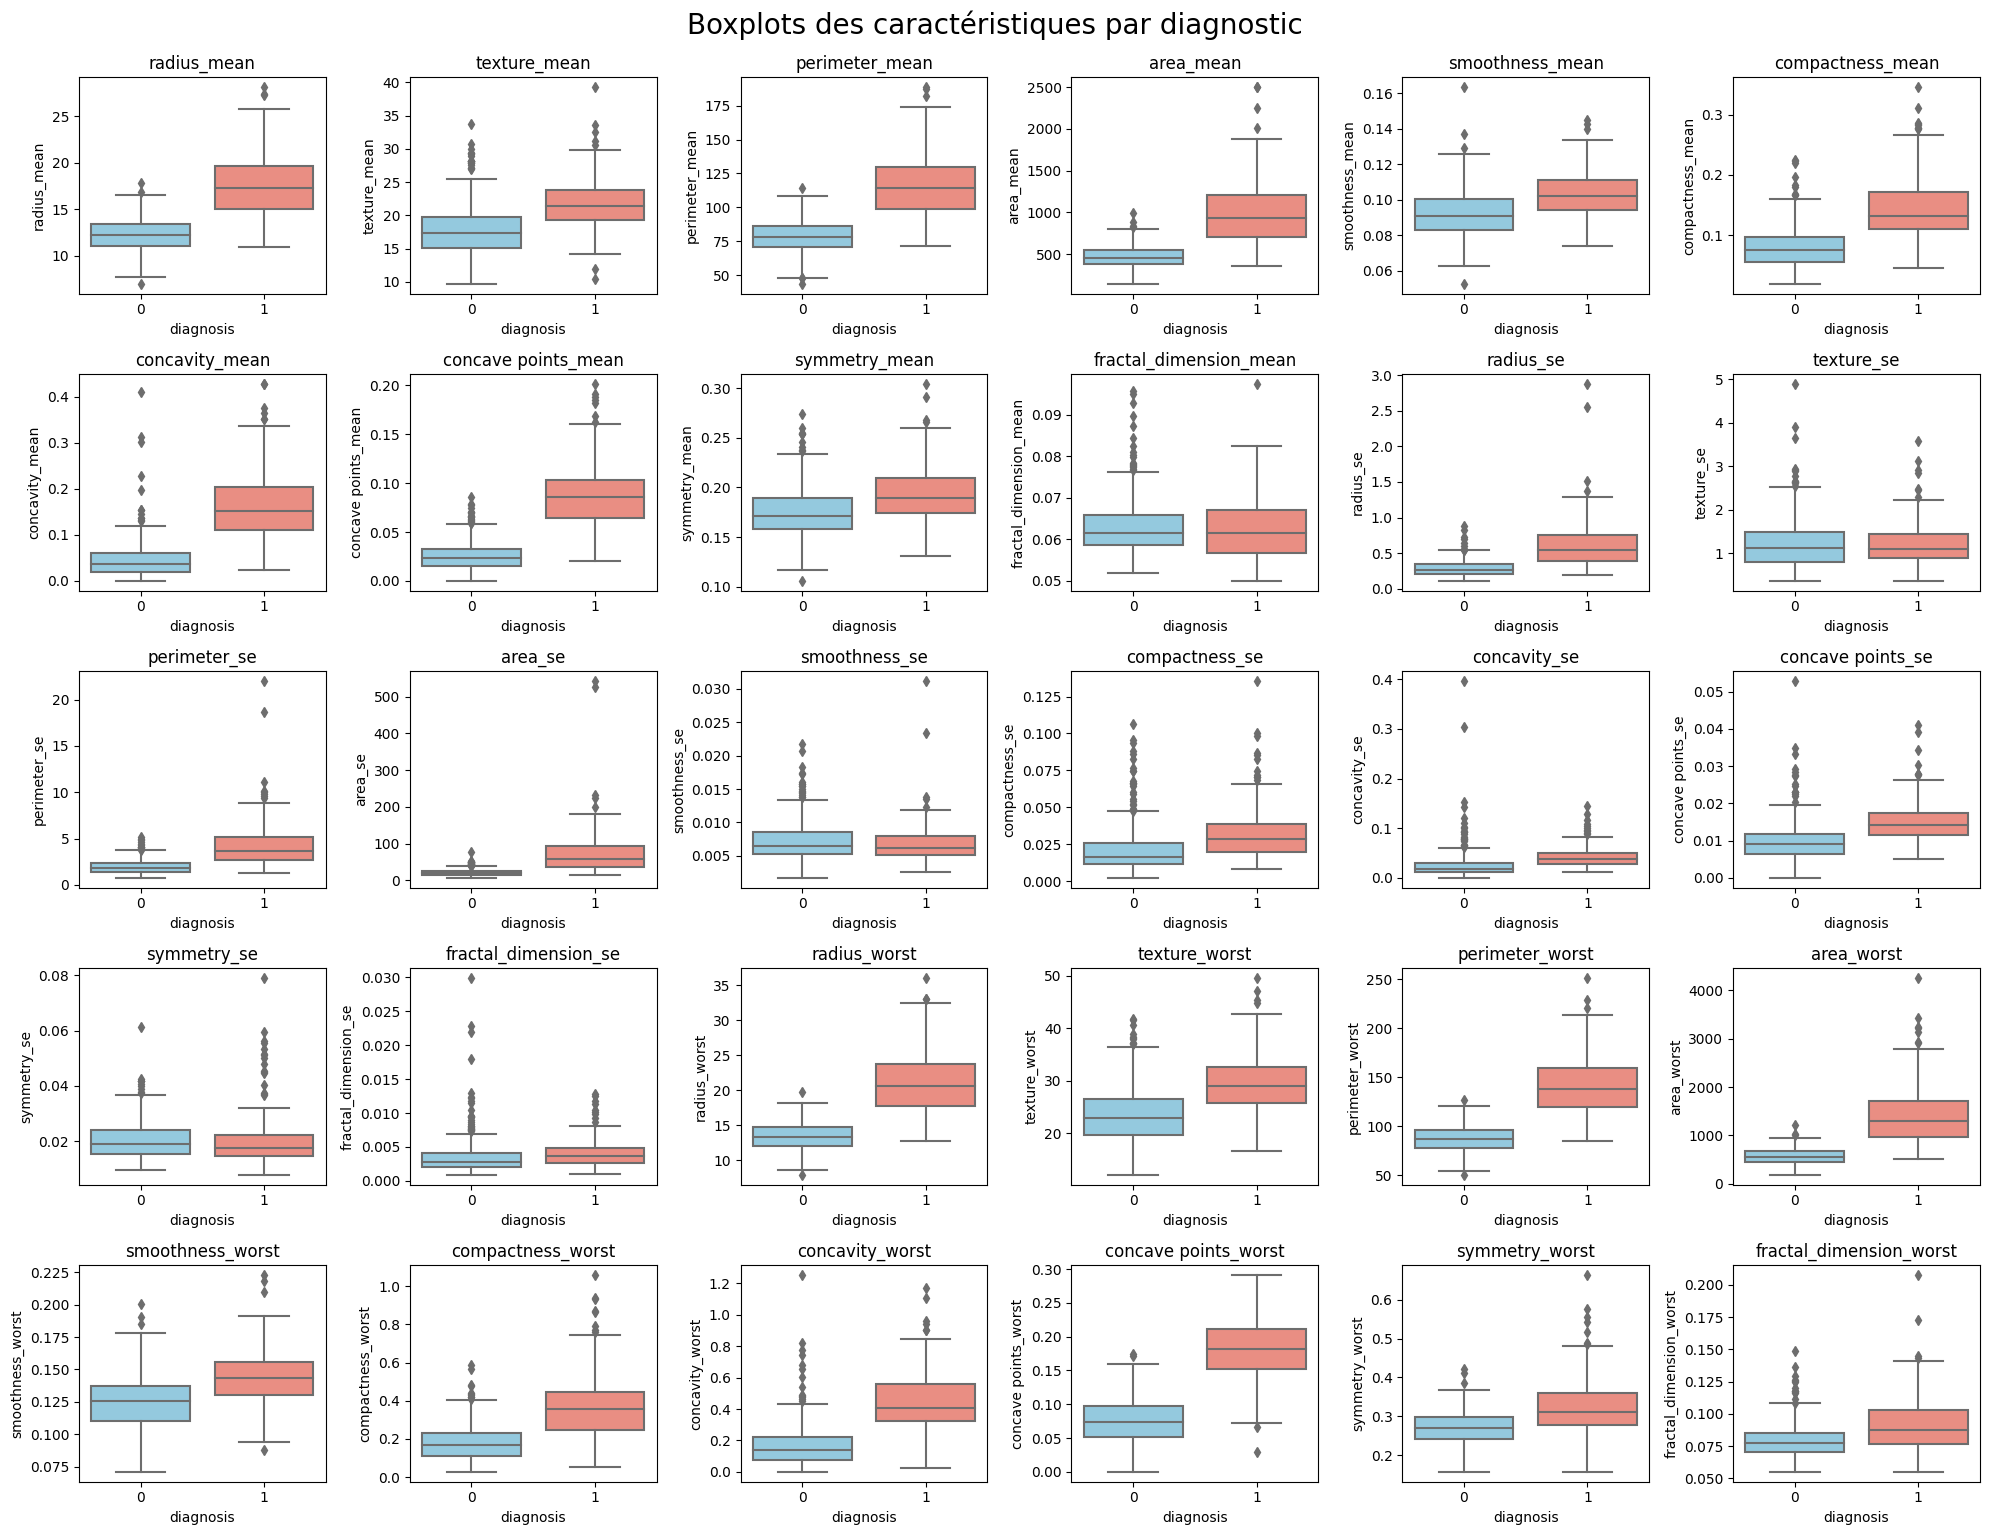

C:\Users\taral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


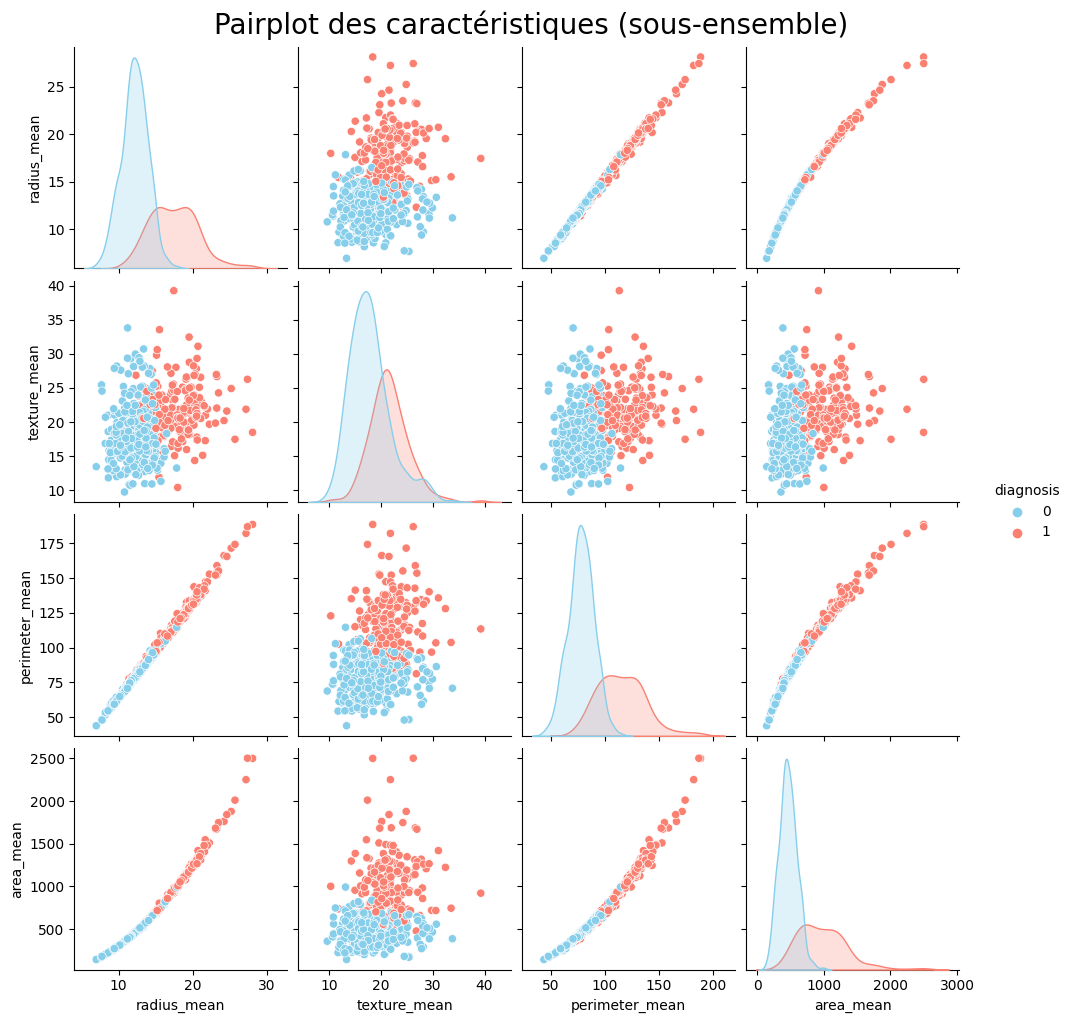

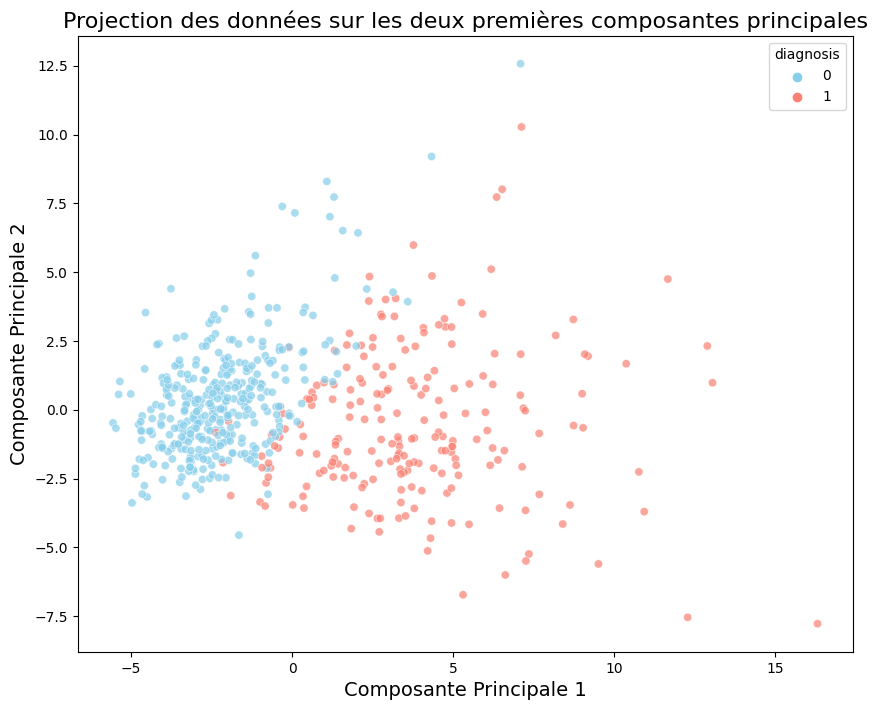

Variance expliquée par la première composante: 0.44
Variance expliquée par la deuxième composante: 0.19
Accuracy: 0.9912280701754386

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Confusion Matrix:
 [[71  0]
 [ 1 42]]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chargement du fichier
file_path = 'bcw_data.csv'

# Lecture des données
data = pd.read_csv(file_path)

# Aperçu des premières lignes du dataset
print(data.head())
print(data.info())
print(data.describe())

# Suppression des colonnes inutiles
data_cleaned = data.drop(columns=["Unnamed: 32", "id"])

# Vérification des valeurs manquantes
if data_cleaned.isnull().sum().sum() > 0:
    print("Attention : Il y a des valeurs manquantes dans les données.")
    data_cleaned = data_cleaned.dropna()

# Encodage de la variable cible
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'B': 0, 'M': 1})

# Aperçu de la répartition des diagnostics
diagnosis_distribution = data_cleaned["diagnosis"].value_counts()

# Visualisation de la répartition des diagnostics
plt.figure(figsize=(8, 6))
diagnosis_distribution.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Répartition des diagnostics (Bénin vs Malin)', fontsize=16)
plt.xlabel('Type de diagnostic', fontsize=14)
plt.ylabel('Nombre de cas', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcul des corrélations entre les variables numériques
correlation_matrix = data_cleaned.drop(columns=["diagnosis"]).corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title('Matrice de corrélation entre les caractéristiques', fontsize=16)
plt.show()

# Analyse univariée: Distribution des caractéristiques numériques
data_cleaned.drop(columns=["diagnosis"]).hist(bins=30, figsize=(20, 15), color='skyblue', alpha=0.7)
plt.suptitle('Distribution des caractéristiques numériques', fontsize=20)
plt.show()

# Analyse bivariée: Boxplots pour visualiser la distribution des caractéristiques par diagnostic
plt.figure(figsize=(20, 15))
for i, column in enumerate(data_cleaned.columns[1:], 1):
    plt.subplot(5, 6, i)
    sns.boxplot(x='diagnosis', y=column, data=data_cleaned, palette=['skyblue', 'salmon'])
    plt.title(column)
    plt.tight_layout()
plt.suptitle('Boxplots des caractéristiques par diagnostic', fontsize=20, y=1.02)
plt.show()

# Analyse multivariée: Pairplot pour visualiser les relations entre les caractéristiques
sns.pairplot(data_cleaned, vars=data_cleaned.columns[1:5], hue='diagnosis', palette=['skyblue', 'salmon'], diag_kind='kde')
plt.suptitle('Pairplot des caractéristiques (sous-ensemble)', fontsize=20, y=1.02)
plt.show()

# Normalisation des caractéristiques
scaler = StandardScaler()
features = data_cleaned.drop(columns=["diagnosis"])
features_scaled = scaler.fit_transform(features)

# Application de PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Création d'un DataFrame avec les composantes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ajout de la variable cible pour visualisation
principal_df = pd.concat([principal_df, data_cleaned['diagnosis']], axis=1)

# Visualisation des deux premières composantes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=principal_df, palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Projection des données sur les deux premières composantes principales', fontsize=16)
plt.xlabel('Composante Principale 1', fontsize=14)
plt.ylabel('Composante Principale 2', fontsize=14)
plt.show()

# Explication des composantes
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par la première composante: {explained_variance[0]:.2f}")
print(f"Variance expliquée par la deuxième composante: {explained_variance[1]:.2f}")

# Modélisation: Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(principal_df[['PC1', 'PC2']], data_cleaned['diagnosis'], test_size=0.2, random_state=42)

# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Variance Expliquée par PCA
Première Composante Principale (PC1) : 44%

La première composante principale capture 44% de la variance totale des données. Cela signifie qu'elle contient une grande partie de l'information présente dans les données d'origine.
Deuxième Composante Principale (PC2) : 19%

La deuxième composante principale capture 19% de la variance totale. Combinée avec la première, nous avons 63% de la variance totale expliquée par ces deux composantes.
Interprétation : Les deux premières composantes principales expliquent ensemble 63% de la variance totale des données. Cela signifie que la dimensionnalité a été réduite tout en conservant une quantité significative d'information. Bien que 63% ne soit pas la totalité de la variance, cela peut être suffisant pour une bonne performance du modèle, comme le montre le score d'exactitude.

Performance du Modèle :
Accuracy : 99.12%
L'accuracy mesure le pourcentage de prédictions correctes. Avec une précision de 99.12%, le modèle est capable de prédire correctement la classe de la plupart des échantillons.
Rapport de Classification
Précision (Precision) : La précision indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.

Classe 0 (Bénin) : 0.99
Classe 1 (Malin) : 1.00
Rappel (Recall) : Le rappel montre la proportion de vrais positifs détectés parmi tous les cas positifs réels.

Classe 0 (Bénin) : 1.00
Classe 1 (Malin) : 0.98
F1-Score : La moyenne harmonique de la précision et du rappel, utile pour évaluer un modèle lorsque qu'on a besoin d'un équilibre entre précision et rappel.

Classe 0 (Bénin) : 0.99
Classe 1 (Malin) : 0.99
Interprétation : Les scores de précision, de rappel et de F1 sont tous très élevés pour les deux classes, indiquant que le modèle est bien équilibré et performant pour les deux types de diagnostics.

Matrice de Confusion :
Prédit Positif	Prédit Négatif
Réel Positif (0)	71	0
Réel Négatif (1)	1	42
Vrais Positifs (VP) = 71 : Le modèle a correctement prédit 71 cas bénins.
Faux Positifs (FP) = 0 : Le modèle n'a pas prédit de cas bénins alors qu'ils étaient réellement malins.
Vrais Négatifs (VN) = 42 : Le modèle a correctement prédit 42 cas malins.
Faux Négatifs (FN) = 1 : Le modèle a prédit 1 cas bénin alors qu'il était réellement malin.
Interprétation : La matrice de confusion montre que le modèle fait très peu d'erreurs, avec seulement un faux négatif. Cela signifie que le modèle est très efficace pour distinguer entre les diagnostics bénins et malins.

Conclusion :
Le modèle de régression logistique, même après réduction de la dimensionnalité avec PCA, fonctionne bien. Les métriques de performance indiquent que le modèle est capable de prédire avec une grande précision et un bon équilibre entre les classes. Cela signifie que le modèle est capable de distinguer entre les diagnostics bénins et malins avec une grande précision.